<a href="https://colab.research.google.com/github/SNMHZ/finedust_predict/blob/master/%EC%88%98%EC%B0%BD%EB%8F%99%EB%94%A5%EB%9F%AC%EB%8B%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기존 모델

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

import chardet

# with open('/content/drive/My Drive/PBL/suchang.xlsx', 'rb') as f:
#     result = chardet.detect(f.readline())
df = pd.read_excel("https://github.com/SNMHZ/finedust_predict/raw/master/dataset/leehyun1218.xlsx")

In [ ]:
df

,SO2,PM10,PM25,O3,NO2,CO,temp,rain,wind,humid,PM10_res
0,0.004,56,33,0.002,0.039,0.7,-0.1,NaN,0.6,90,56
1,0.002,56,38,0.001,0.031,0.6,-0.3,NaN,0.2,91,54
2,0.003,54,36,0.001,0.033,0.7,-0.9,NaN,0.0,93,60
3,0.002,60,39,0.001,0.028,0.6,-1.5,NaN,0.3,94,59
4,0.002,59,36,0.001,0.026,0.6,-1.6,NaN,0.2,95,48
...,...,...,...,...,...,...,...,...,...,...,...
8754,0.003,79,26,0.031,0.017,0.3,3.3,NaN,3.3,30,66
8755,0.003,66,22,0.033,0.014,0.3,2.1,NaN,2.4,29,60
8756,0.004,60,18,0.031,0.015,0.4,1.7,NaN,2.5,26,59
8757,0.004,59,17,0.034,0.011,0.3,1.3,NaN,2.4,28,55


In [ ]:
features = df.PM10
target = df.PM10_res

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

In [ ]:
x_train, x_test

(8414    23
 5049    39
 7403    40
 1535    76
 5518    28
         ..
 5734    30
 5191    37
 5390    14
 860     24
 7270    69
 Name: PM10, Length: 7007, dtype: int64, 6055    53
 5556    22
 8148    64
 7945    84
 3319    85
         ..
 8344    51
 100     75
 6604    27
 1783    55
 7584    40
 Name: PM10, Length: 1752, dtype: int64)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=8, activation='relu', input_shape=(1,)),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
219/219 [==============================] - 1s 908us/step - loss: 4499.3223 - accuracy: 0.0022
Epoch 2/200
219/219 [==============================] - 0s 996us/step - loss: 1349.8205 - accuracy: 5.7321e-04
Epoch 3/200
219/219 [==============================] - 0s 878us/step - loss: 856.8615 - accuracy: 1.5364e-04
Epoch 4/200
219/219 [==============================] - 0s 920us/step - loss: 617.7712 - accuracy: 2.3319e-04
Epoch 5/200
219/219 [==============================] - 0s 918us/step - loss: 979.5358 - accuracy: 2.4155e-04
Epoch 6/200
219/219 [==============================] - 0s 957us/step - loss: 1230.6099 - accuracy: 2.1681e-04
Epoch 7/200
219/219 [==============================] - 0s 917us/step - loss: 1171.4847 - accuracy: 2.6271e-04
Epoch 8/200
219/219 [==============================] - 0s 867us/step - loss: 969.6593 - accuracy: 6.4652e-05
Epoch 9/200
219/219 [==============================] - 0s 916us/step - loss: 1533.5655 - accuracy: 4.8504e-05
Epoch 10/200
219/2

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("정확도", test_acc)

55/55 - 0s - loss: 882.9586 - accuracy: 0.0000e+00
정확도 0.0


# outlier 제거 후 모델

## 데이터 로딩

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#2003년도부터 2017년도까지 미세먼지 데이터 로딩
DUST_DF_DICT={}
for i in range(15):
  DUST_DF_DICT['DUST_%d'%(i+2003)]=pd.read_csv('https://github.com/SNMHZ/finedust_predict/raw/master/dataset/%d.csv'%(i+2003), encoding='EUC_KR')

## 우리가 얻은 미세먼지 데이터 상태

In [ ]:
DUST_DF_DICT['DUST_2017'].columns

Index(['측정소명', '년', '월', '일', '시', 'SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO'], dtype='object')

In [ ]:
DUST_DF_DICT['DUST_2017']

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [ ]:
m_dict={}
for name in DUST_DF_DICT['DUST_2017']['측정소명']:
  m_dict[name]=0

In [ ]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [ ]:
len(m_dict.keys())

13

## 함수 만들기(전처리 작업한 것. 중요X)

In [ ]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [ ]:
dust2017=DUST_DF_DICT['DUST_2017'].copy()

In [ ]:
suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']=='수창동').dropna().index]

In [ ]:
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3
...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4


In [ ]:
suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4,47.0


In [ ]:
suchangdong=suchangdong[:-1]
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96401,수창동,2017,12,31,19,0.003,76,17,0.020,0.018,0.4,74.0
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
suchangdong.columns[5:]

Index(['SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO', 'PM10_res'], dtype='object')

In [ ]:
suchangdong_drop=suchangdong[suchangdong.columns[5:]]
suchangdong_drop

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
suchangdong_drop.corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.304133,0.273105,-0.344421,0.676843,0.669121,0.320853
PM10,0.304133,1.000000,0.791031,0.005717,0.286660,0.299287,0.340913
PM25,0.273105,0.791031,1.000000,-0.073717,0.281354,0.287920,0.291834
O3,-0.344421,0.005717,-0.073717,1.000000,-0.588629,-0.359648,-0.034588
NO2,0.676843,0.286660,0.281354,-0.588629,1.000000,0.716747,0.312683
CO,0.669121,0.299287,0.287920,-0.359648,0.716747,1.000000,0.319632
PM10_res,0.320853,0.340913,0.291834,-0.034588,0.312683,0.319632,1.000000


In [ ]:
def dong_checker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop.corr(method='pearson')

In [ ]:
DUST_DF_DICT['DUST_2017'].columns

Index(['측정소명', '년', '월', '일', '시', 'SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO'], dtype='object')

In [ ]:
DUST_DF_DICT['DUST_2017']

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [ ]:
m_dict={}
for name in DUST_DF_DICT['DUST_2017']['측정소명']:
  m_dict[name]=0

In [ ]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [ ]:
len(m_dict.keys())

13

## concat test(전처리 작업. 중요X)

In [ ]:
def dong_df_maker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop

In [ ]:
testd1=dong_df_maker(DUST_DF_DICT['DUST_2017'], '수창동')
testd2=dong_df_maker(DUST_DF_DICT['DUST_2017'], '태전동')

In [ ]:
testd1

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
testd2

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
7,0.004,65,37,0.001,0.038,1.0,59.0
18,0.004,59,38,0.001,0.036,1.0,78.0
29,0.004,78,48,0.001,0.032,0.9,62.0
40,0.003,62,40,0.001,0.028,0.9,60.0
51,0.004,60,38,0.001,0.028,0.9,56.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


In [ ]:
pd.concat([testd1, testd2])

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


## 모델 만들기

In [ ]:
suchangdong_drop_outlier = suchangdong_drop[ (suchangdong_drop['PM10']<=500) & (suchangdong_drop['PM10_res']<=500)]
suchangdong_drop_outlier

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
features = suchangdong_drop_outlier[['PM10']]#[suchangdong_drop.columns[:-1]]
features

,PM10
0,65
11,63
22,64
33,68
44,82
...,...
96401,76
96414,74
96427,62
96440,59


In [ ]:
target = suchangdong_drop_outlier[['PM10_res']]
target

,PM10_res
0,63.0
11,64.0
22,68.0
33,82.0
44,72.0
...,...
96401,74.0
96414,62.0
96427,59.0
96440,54.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=5)

In [ ]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train -= X_mean
X_train /= X_std
X_test -= X_mean
X_test /= X_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

print(X_train, y_train)

           PM10
71181 -1.383428
13123  0.630114
65450 -0.115642
26664  0.480963
4059   0.145372
...         ...
80388 -0.078355
33594  0.145372
44979  1.301294
24838  1.711460
32153 -0.227506

[6986 rows x 1 columns]        PM10_res
71181 -1.366741
13123  0.476690
65450 -0.113208
26664  1.472144
4059  -0.260682
...         ...
80388 -0.223814
33594  0.071135
44979  1.214063
24838  1.472144
32153  0.108004

[6986 rows x 1 columns]


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, activation='relu', input_shape=(1,)),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=8, activation='relu'),
                             tf.keras.layers.Dense(units=1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')

In [51]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
140/140 [==============================] - 1s 2ms/step - loss: 0.1414 - val_loss: 0.1487
Epoch 2/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1450 - val_loss: 0.1489
Epoch 3/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1339 - val_loss: 0.1498
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1438 - val_loss: 0.1492
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 0.1685 - val_loss: 0.1482
Epoch 6/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1460 - val_loss: 0.1488
Epoch 7/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1357 - val_loss: 0.1522
Epoch 8/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1351 - val_loss: 0.1478
Epoch 9/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1615 - val_loss: 0.1481
Epoch 10/100
140/140 [==============================] - 0s 1ms/step - loss: 0.1317 - val_lo

In [60]:
y_pred = model.predict(X_test)
u = ((y_test - y_pred) ** 2).sum()
v = ((y_test - y_test.mean()) ** 2).sum()
R = 1 - (u / v)
R

PM10_res    0.873753
dtype: float64

In [ ]:
np.arange(min(X_test['PM10']), max(X_test['PM10']), 1).reshape(1, -1)

array([[-1.6817303, -0.6817303,  0.3182697,  1.3182697,  2.3182697,
         3.3182697,  4.3182697,  5.3182697]])

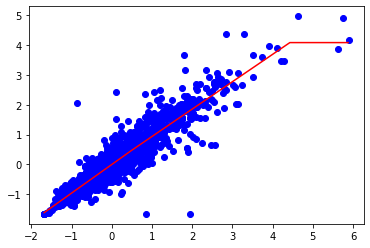

In [53]:
line_x = np.arange(min(X_test['PM10']), max(X_test['PM10']), 0.01)#.reshape(1, -1)
line_y=model.predict(line_x)

plt.plot(X_test['PM10'], y_test['PM10_res'], 'bo')
plt.plot(line_x, line_y, 'r-')

plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

In [63]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [64]:
model.score(X_test, y_test)

0.8713902764958364